In [ ]:
import sys
sys.executable

'd:\\ntbu_python\\ml\\ml.yibame2\\venv\\scripts\\python.exe'

# 迴歸樹

### 決策點的 MSE(Mean Square Error) 平均分布範圍
> mse 為 和 平均值的距離     MSE = 1/n * sigma(Xi - mu)^2 , 取平方為了不管方向只管距離

>Xi:房價, mu:平均房價

> ex: 預測是 0, mse為5, 那實際就可能是 +-5, 所以 mse 越小越好 => 信心程度越高,  越不容易出錯

## 衡量迴歸樹的好壞

> (https://codertw.com/程式語言/404042/)

> (https://ithelp.ithome.com.tw/articles/10216054)

> (https://medium.com/@chih.sheng.huang821/機器-深度學習-基礎介紹-損失函數-loss-function-2dcac5ebb6cb)

### Root Mean Squared Error (均方根誤差)
> RMSE = root(1/n*sigma(PREi - 正確答案)^2) = root(MSE)   , PREi:預測值  ,因為 mse 有做平方, 誤差離群值會大量影響結果, RMSE 有開更號還原回來, 但是和 MAE 比還是有差

### Mean Absolute Error (絕對平均誤差)
> MAE = 1/n*sigma|PREi - 正確|  , 會因基數大小的不同, 造成無法比較二個結果 (ex: 紐約跟台北的房價差很多)

### R Squared
> a = 1/n*(PREi - 正確i)^2 = MSE,  b = 1/n*(平均 - 正確i)^2 ; a 越小越好->預測跟正確差不多  b 越大越好->都猜得跟平均一樣代表瞎猜

> a/b 為特別值, =0 表示 a = 0, 預測很準 100%; =1 表示不看題瞎猜, 50%

> r2 socre = 1 - a/b, also 1 - (pi - fi)^2/(fi - fi_avg)^2     0 為準, 1 為瞎

> 通常用 r2 score

> squre = java math.pow = 平方 ; math.squrt = 平方根


## 優點: 
> 可解釋性



CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

MEDV：自住房中位数价格，单位是千元"

In [2]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston["data"],
                 columns=boston["feature_names"])
df["ans"] = boston["target"] # 附加欄位
# df.to_csv("load_boston.csv", encoding="utf-8", index=False)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
from sklearn.model_selection import train_test_split
# Step1. 留出驗證資料
x_train, x_test, y_train, y_test = train_test_split(boston["data"],
                 boston["target"],
#                  test_size=0.1, random_state=0) # 如加入 random_state=0 會使每次切分結果一樣
                 test_size=0.1) # 如加入 random_state=0 會使每次切分結果一樣

In [4]:
# Step2. 讓演算法學習訓練資料
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
# reg = DecisionTreeRegressor()
# 學習: fit
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

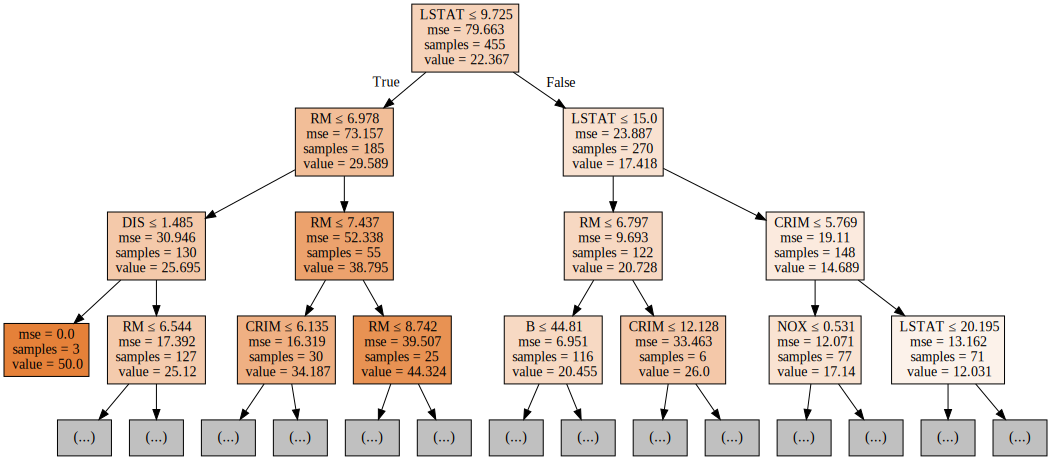

In [8]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg,
                    feature_names=boston["feature_names"],
                    filled=True, 
                    special_characters=True,
                    max_depth=3) # max_depth=3 只畫3層
graphviz.Source(g)

In [6]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
score = r2_score(y_test, pre)
print("預測: ", pre)
print("分數: ", score)

預測:  [22.84324324 31.9        47.50769231 22.84324324  7.55       21.03793103
 16.48363636 26.52424242 21.03793103  9.08888889 22.84324324  9.08888889
 31.9        19.13333333 22.84324324 21.03793103 26.52424242 21.03793103
 22.84324324 22.84324324 13.09230769 22.84324324 22.84324324 21.03793103
 22.84324324 22.84324324 13.43846154 19.13333333 47.50769231 31.9
 16.48363636 22.84324324 13.09230769 19.13333333 16.48363636 21.03793103
 16.48363636  9.08888889 42.6        31.09444444 26.52424242 31.09444444
 50.          9.08888889 47.50769231 26.52424242  7.55       21.03793103
 26.52424242 42.6         9.08888889]
分數:  0.8917819098075701
